In [1]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
voy1_df = pd.read_csv('voy1_ephemeris.csv') #daily ephemeris of voyager1
voy1_df.loc[voy1_df['ra'] > 180, 'ra'] -= 360
voy1_df['ra'] = voy1_df['ra'] * -1

voy2_df = pd.read_csv('voy2_ephemeris.csv') #daily ephemeris of voyager2
voy2_df.loc[voy2_df['ra'] > 180, 'ra'] -= 360
voy2_df['ra'] = voy2_df['ra'] * -1

pio10_df = pd.read_csv('pio10_ephemeris.csv') #daily ephemeris of pioneer 10
pio10_df.loc[pio10_df['ra'] > 180, 'ra'] -= 360
pio10_df['ra'] = pio10_df['ra'] * -1

pio11_df = pd.read_csv('pio11_ephemeris.csv') #daily ephemeris of pioneer 11
pio11_df.loc[pio11_df['ra'] > 180, 'ra'] -= 360
pio11_df['ra'] = pio11_df['ra'] * -1

nh_df = pd.read_csv('nh_ephemeris.csv') #daily ephemeris of new horizons
nh_df.loc[nh_df['ra'] > 180, 'ra'] -= 360
nh_df['ra'] = nh_df['ra'] * -1

imp_ra = [-65.45370, (258.67438 - 360) * (-1), 100.62417, -69.59450, (301.76331 - 360) * (-1), 56.26593, 113.19065, -78.56071, -80.24246, 69.30245, (283.68997 - 360) * (-1), 73.32117, 152.91219, (288.37168 - 360) * (-1), 70.77865]
imp_dec = [25.537, 12.00580, 12.0629, 41.46983, -58.35810, -60.11071, -30.75413, 26.04500, 26.12327, -34.80406, -8.94197, -9.06491, -10.02864, -20.41069, -20.28721]

In [36]:
start_ra = [65.4537, 69.5945, 246.80935, 290.69755, 207.08781]
start_dec = [25.537, 41.46983, -30.75413, -34.80406, -10.02864]

inter_ra = [256.97420, 300.63299]
inter_dec = [12.37134, -57.64658]

nep_ra = [65.19843, 266.31205, 282.72394]
nep_dec = [24.55983, -7.41871, -20.97992]

end_ra = [259.27106, 303.57749, 75.68049, 271.46289, 288.30129]
end_dec = [12.05926, -60.14532, 25.86096, -7.9622, -20.36808]

In [37]:
ra = [start_ra, inter_ra, nep_ra, end_ra]

for list in ra:
    for i in range(len(list)):
        if list[i] > 180:
            list[i] -= 360
        list[i] *= -1

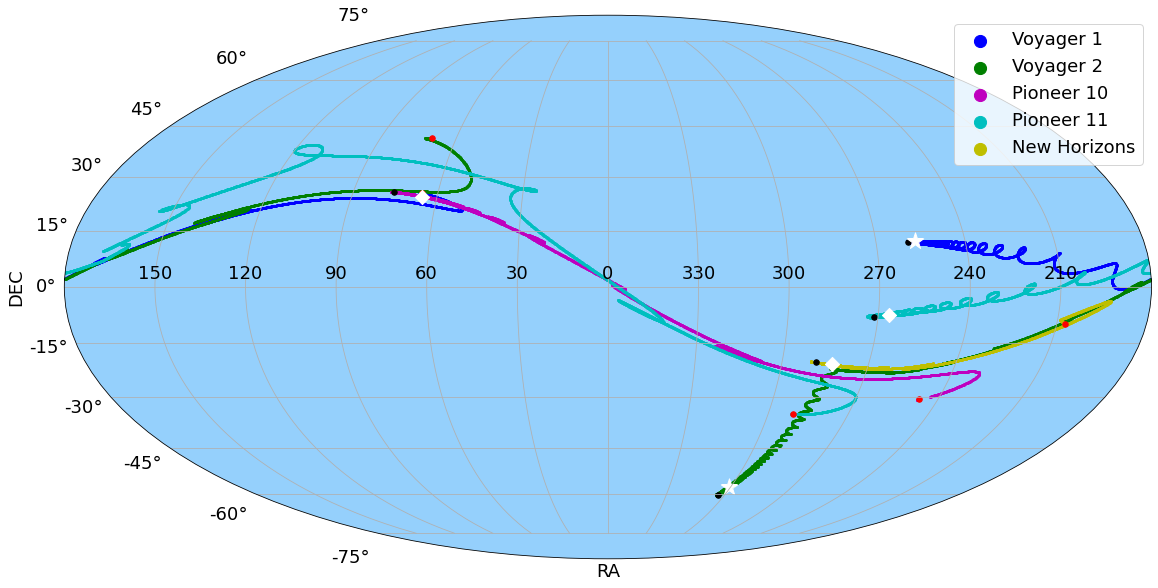

In [56]:
plt.rcParams.update({'font.size': 18})

tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = 'mollweide')

ax.scatter(np.radians(voy1_df['ra']), np.radians(voy1_df['dec']), c = 'b', s = 3, label="Voyager 1")
ax.scatter(np.radians(voy2_df['ra']), np.radians(voy2_df['dec']), c = 'g', s = 3, label="Voyager 2")
ax.scatter(np.radians(pio10_df['ra']), np.radians(pio10_df['dec']), c = 'm', s = 3, label="Pioneer 10")
ax.scatter(np.radians(pio11_df['ra']), np.radians(pio11_df['dec']), c = 'c', s = 3, label="Pioneer 11")
ax.scatter(np.radians(nh_df['ra']), np.radians(nh_df['dec']), c = 'y', s = 3, label="New Horizons")

ax.scatter(np.radians(start_ra), np.radians(start_dec), c = 'r', s = 30)
ax.scatter(np.radians(end_ra), np.radians(end_dec), c = 'k', s = 30)
ax.scatter(np.radians(inter_ra), np.radians(inter_dec), c = 'w', s = 300, marker="*")
ax.scatter(np.radians(nep_ra), np.radians(nep_dec), c = 'w', s = 100, marker="D")

ax.set_xticklabels(tick_labels)
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.set_facecolor('xkcd:light blue')
ax.grid(True)
ax.legend(markerscale=7)

plt.savefig('combined_ephemeris.png')